8.1 Loading Images

In [5]:
# Load library
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image as grayscale
image = cv2.imread("plane.jpg", cv2.IMREAD_GRAYSCALE)

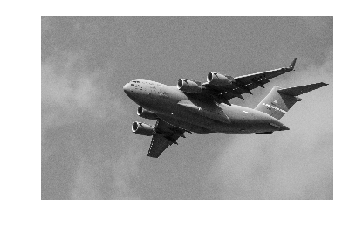

In [6]:
# Show image
plt.imshow(image, cmap="gray"), plt.axis("off")
plt.show()

In [7]:
# Show data type
type(image)

numpy.ndarray

In [8]:
# Show dimensions
image.shape

(246, 384)

In [9]:
# Load image in color
image_bgr = cv2.imread("plane.jpg", cv2.IMREAD_COLOR)

# Show pixel
image_bgr[0,0]

array([255, 255, 255], dtype=uint8)

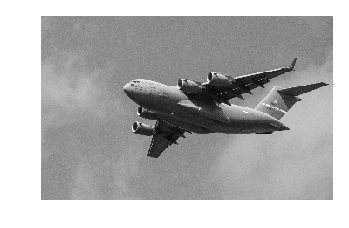

In [10]:
# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

8.2 Saving Images

In [11]:
# Load libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image as grayscale
image = cv2.imread("plane.jpg", cv2.IMREAD_GRAYSCALE)

# Save image
cv2.imwrite("plane_new.jpg", image)

True

8.3 Resizing Images

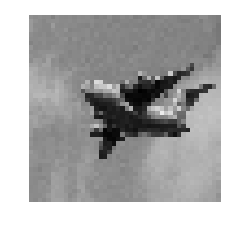

In [12]:
# Load image
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image as grayscale
image = cv2.imread("plane.jpg", cv2.IMREAD_GRAYSCALE)

# Resize image to 50 pixels by 50 pixels
image_50x50 = cv2.resize(image, (50, 50))

# View image
plt.imshow(image_50x50, cmap="gray"), plt.axis("off")
plt.show()

# Resizing images is a common task in image preprocessing for two reasons. First, images come in all shapes and sizes, 
# and to be usable as features, images must have the same dimensions. This standardization of image size does come with 
# costs, however; images are matrices of information and when we reduce the size of the image we are reducing the size 
# of that matrix and the information it contains. Second, machine learning can require thousands or hundreds of thousands 
# of images. When those images are very large they can take up a lot of memory, and by resizing them we can dramatically 
# reduce memory usage. Some common image sizes for machine learning are 32 × 32, 64 × 64, 96 × 96, and 256 × 256.

8.4 Cropping Images

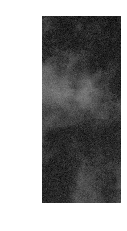

In [13]:
# Load image
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image in grayscale
image = cv2.imread("plane.jpg", cv2.IMREAD_GRAYSCALE)

# Select first half of the columns and all rows
image_cropped = image[:,:128]

# Show image
plt.imshow(image_cropped, cmap="gray"), plt.axis("off")
plt.show()

8.5 Blurring Images

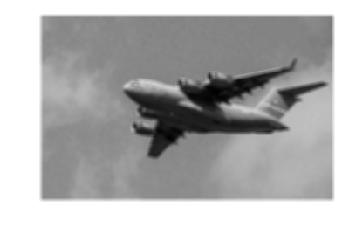

In [14]:
# Load libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image as grayscale
image = cv2.imread("plane.jpg", cv2.IMREAD_GRAYSCALE)

# Blur image
image_blurry = cv2.blur(image, (5,5))

# Show image
plt.imshow(image_blurry, cmap="gray"), plt.axis("off")
plt.show()

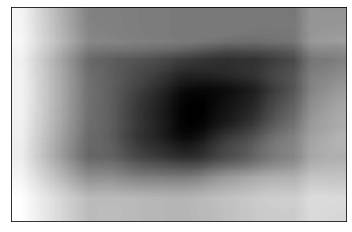

In [15]:
# To highlight the effect of kernel size, here is the same blurring with a 100 × 100 kernel:

# Blur image
image_very_blurry = cv2.blur(image, (100,100))

# Show image
plt.imshow(image_very_blurry, cmap="gray"), plt.xticks([]), plt.yticks([])
plt.show()

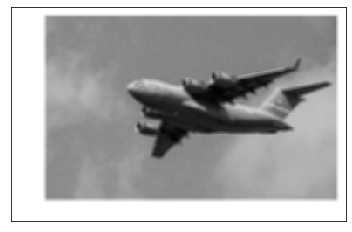

In [17]:
# Create kernel
kernel = np.ones((5,5)) / 25.0

# Show kernel
kernel

# Apply kernel
image_kernel = cv2.filter2D(image, -1, kernel)

# Show image
plt.imshow(image_kernel, cmap="gray"), plt.xticks([]), plt.yticks([])
plt.show()

8.6 Sharpening Images

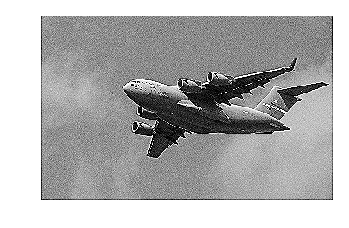

In [18]:
# Load libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image as grayscale
image = cv2.imread("plane.jpg", cv2.IMREAD_GRAYSCALE)

# Create kernel
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

# Sharpen image
image_sharp = cv2.filter2D(image, -1, kernel)

# Show image
plt.imshow(image_sharp, cmap="gray"), plt.axis("off")
plt.show()

8.7 Enhancing Contrast

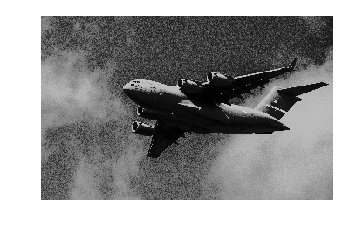

In [19]:
# Histogram equalization is a tool for image processing that can make objects and shapes stand out. When we have a 
# grayscale image, we can apply OpenCV’s equalizeHist directly on the image:

# Load libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image
image = cv2.imread("plane.jpg", cv2.IMREAD_GRAYSCALE)

# Enhance image
image_enhanced = cv2.equalizeHist(image)

# Show image
plt.imshow(image_enhanced, cmap="gray"), plt.axis("off")
plt.show()

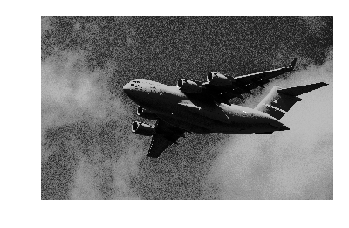

In [20]:
# However, when we have a color image, we first need to convert the image to the YUV color format. 
# The Y is the luma, or brightness, and U and V denote the color. After the conversion, we can apply equalizeHist 
# to the image and then convert it back to BGR or RGB:

# Load image
image_bgr = cv2.imread("plane.jpg")

# Convert to YUV
image_yuv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2YUV)

# Apply histogram equalization
image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0])

# Convert to RGB
image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)

# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

8.8 Isolating Colors

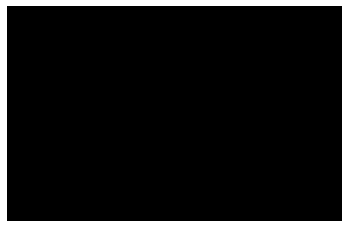

In [21]:
# Load libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image
image_bgr = cv2.imread('plane.jpg')

# Convert BGR to HSV
image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)

# Define range of blue values in HSV
lower_blue = np.array([50,100,50])
upper_blue = np.array([130,255,255])

# Create mask
mask = cv2.inRange(image_hsv, lower_blue, upper_blue)

# Mask image
image_bgr_masked = cv2.bitwise_and(image_bgr, image_bgr, mask=mask)

# Convert BGR to RGB
image_rgb = cv2.cvtColor(image_bgr_masked, cv2.COLOR_BGR2RGB)

# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

8.9 Binarizing Images

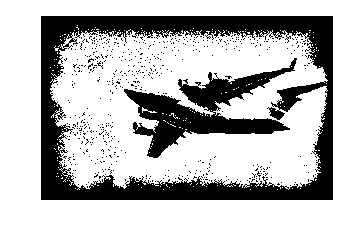

In [23]:
# Thresholding is the process of setting pixels with intensity greater than some value to be white and less than the 
# value to be black. A more advanced technique is adaptive thresholding, where the threshold value for a pixel is 
# determined by the pixel intensities of its neighbors. This can be helpful when lighting conditions change over 
# different regions in an image:
    
# Load libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image as grayscale
image_grey = cv2.imread("plane.jpg", cv2.IMREAD_GRAYSCALE)

# Apply adaptive thresholding
max_output_value = 255
neighborhood_size = 99
subtract_from_mean = 10
image_binarized = cv2.adaptiveThreshold(image_grey,
                                        max_output_value,
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY,
                                        neighborhood_size,
                                        subtract_from_mean)

# Show image
plt.imshow(image_binarized, cmap="gray"), plt.axis("off")
plt.show()    
    
    

8.10 Removing Backgrounds

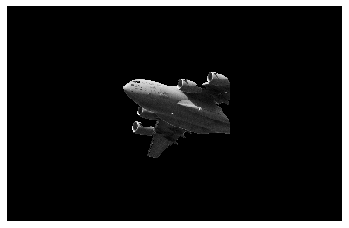

In [25]:
# Load library
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image and convert to RGB
image_bgr = cv2.imread('plane.jpg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Rectangle values: start x, start y, width, height
rectangle = (0, 56, 256, 150)

# Create initial mask
mask = np.zeros(image_rgb.shape[:2], np.uint8)

# Create temporary arrays used by grabCut
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Run grabCut
cv2.grabCut(image_rgb, # Our image
            mask, # The Mask
            rectangle, # Our rectangle
            bgdModel, # Temporary array for background
            fgdModel, # Temporary array for background
            5, # Number of iterations
            cv2.GC_INIT_WITH_RECT) # Initiative using our rectangle

# Create mask where sure and likely backgrounds set to 0, otherwise 1
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

# Multiply image with new mask to subtract background
image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]

# Show image
plt.imshow(image_rgb_nobg), plt.axis("off")
plt.show()

8.11 Detecting Edges

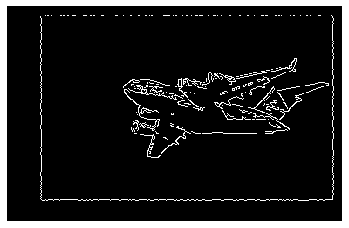

In [28]:
# Load library
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image as grayscale
image_gray = cv2.imread("plane.jpg", cv2.IMREAD_GRAYSCALE)

# Calculate median intensity
median_intensity = np.median(image_gray)

# Set thresholds to be one standard deviation above and below median intensity
lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))
upper_threshold = int(min(255, (1.0 + 0.33) * median_intensity))

# Apply canny edge detector
image_canny = cv2.Canny(image_gray, lower_threshold, upper_threshold)

# Show image
plt.imshow(image_canny, cmap="gray"), plt.axis("off")
plt.show()

# Edge detection is a major topic of interest in computer vision. Edges are important because they are areas of 
# high information. For example, in our image one patch of sky looks very much like another and is unlikely to 
# contain unique or interesting information. However, patches where the background sky meets the airplane contain
# a lot of information (e.g., an object’s shape). Edge detection allows us to remove low-information areas and 
# isolate the areas of images containing the most information.

# There are many edge detection techniques (Sobel filters, Laplacian edge detector, etc.). However, our solution 
# uses the commonly used Canny edge detector. How the Canny detector works is too detailed for this book, but there 
# is one point that we need to address. The Canny detector requires two parameters denoting low and high gradient 
# threshold values. Potential edge pixels between the low and high thresholds are considered weak edge pixels, while 
# those above the high threshold are considered strong edge pixels. OpenCV’s Canny method includes the low and high 
# thresholds as required parameters. In our solution, we set the lower and upper thresholds to be one standard deviation 
# below and above the image’s median pixel intensity. However, there are often cases when we might get better results 
# if we used a good pair of low and high threshold values through manual trial and error using a few images before 
# running Canny on our entire collection of images.

8.12 Detecting Corners

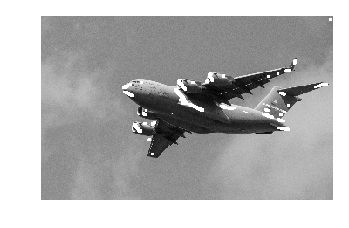

In [29]:
# Load libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image as grayscale
image_bgr = cv2.imread("plane.jpg")
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
image_gray = np.float32(image_gray)

# Set corner detector parameters
block_size = 2
aperture = 29
free_parameter = 0.04

# Detect corners
detector_responses = cv2.cornerHarris(image_gray,
                                      block_size,
                                      aperture,
                                      free_parameter)

# Large corner markers
detector_responses = cv2.dilate(detector_responses, None)

# Only keep detector responses greater than threshold, mark as white
threshold = 0.02
image_bgr[detector_responses >
          threshold *
          detector_responses.max()] = [255,255,255]

# Convert to grayscale
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# Show image
plt.imshow(image_gray, cmap="gray"), plt.axis("off")
plt.show()

# The Harris corner detector is a commonly used method of detecting the intersection of two edges. Our interest in 
# detecting corners is motivated by the same reason as for deleting edges: corners are points of high information. 
# A complete explanation of the Harris corner detector is available in the external resources at the end of this recipe, 
# but a simplified explanation is that it looks for windows (also called neighborhoods or patches) where small movements 
# of the window (imagine shaking the window) creates big changes in the contents of the pixels inside the window. 
# cornerHarris contains three important parameters that we can use to control the edges detected. 
# First, block_size is the size of the neighbor around each pixel used for corner detection. 
# Second, aperture is the size of the Sobel kernel used (don’t worry if you don’t know what that is), 
# and finally there is a free parameter where larger values correspond to identifying softer corners.    

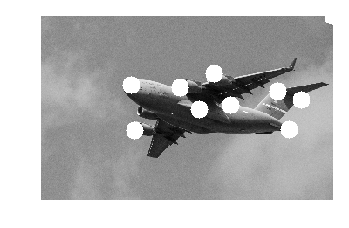

In [30]:
# Alternatively, we can use a similar detector, the Shi-Tomasi corner detector, which works in a similar way to the 
# Harris detector (goodFeaturesToTrack) to identify a fixed number of strong corners. goodFeaturesToTrack takes three 
# major parameters — the number of corners to detect, the minimum quality of the corner (0 to 1), and the minimum 
# Euclidean distance between corners:

# Load images
image_bgr = cv2.imread('plane.jpg')
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# Number of corners to detect
corners_to_detect = 10
minimum_quality_score = 0.05
minimum_distance = 25

# Detect corners
corners = cv2.goodFeaturesToTrack(image_gray,
                                  corners_to_detect,
                                  minimum_quality_score,
                                  minimum_distance)
corners = np.float32(corners)

# Draw white circle at each corner
for corner in corners:
    x, y = corner[0]
    cv2.circle(image_bgr, (x,y), 10, (255,255,255), -1)    

# Convert to grayscale
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# Show image
plt.imshow(image_rgb, cmap='gray'), plt.axis("off")
plt.show()

8.13 Creating Features for Machine Learning

In [31]:
# Load image
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image as grayscale
image = cv2.imread("plane.jpg", cv2.IMREAD_GRAYSCALE)

# Resize image to 10 pixels by 10 pixels
image_10x10 = cv2.resize(image, (10, 10))

# Convert image data to one-dimensional vector
image_10x10.flatten()

array([255, 147, 142, 142, 135, 138, 133, 140, 134, 134, 255, 145, 147,
       137, 135, 139, 145, 139, 138, 133, 255, 155, 136, 146, 140, 139,
       139, 141, 145, 144, 255, 169, 169, 143, 139, 176,  52,  45, 168,
       175, 255, 168, 170, 137,  39, 162,  50, 154,  59, 190, 255, 158,
       149, 154, 104,  33,  31,  40, 187, 190, 255, 146, 150, 152,  48,
       140, 158, 178, 179, 175, 255, 134, 157, 158, 146, 141, 170, 168,
       182, 172, 255, 147, 161, 166, 142, 147, 159, 170, 179, 165, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255], dtype=uint8)

In [32]:
# If the image is in color, instead of each pixel being represented by one value, it is represented by 
# multiple values (most often three) representing the channels (red, green, blue, etc.) that blend to make the 
# final color of that pixel. For this reason, if our 10 × 10 image is in color, we will have 300 feature values for 
# each observation:

# Load image in color
image_color = cv2.imread("plane.jpg", cv2.IMREAD_COLOR)

# Resize image to 10 pixels by 10 pixels
image_color_10x10 = cv2.resize(image_color, (10, 10))

# Convert image data to one-dimensional vector, show dimensions
image_color_10x10.flatten().shape

(300,)

8.14 Encoding Mean Color as a Feature

In [33]:
# Each pixel in an image is represented by the combination of multiple color channels (often three: red, green, and blue). 
# Calculate the mean red, green, and blue channel values for an image to make three color features representing the 
# average colors in that image:

# Load libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image as BGR
image_bgr = cv2.imread("plane.jpg", cv2.IMREAD_COLOR)

# Calculate the mean of each channel
channels = cv2.mean(image_bgr)

# Swap blue and red values (making it RGB, not BGR)
observation = np.array([(channels[2], channels[1], channels[0])])

# Show mean channel values
observation

array([[169.3165968, 169.3165968, 169.3165968]])

8.15 Encoding Color Histograms as Features

In [35]:
# Load libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image
image_bgr = cv2.imread("plane.jpg", cv2.IMREAD_COLOR)

# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Create a list for feature values
features = []

# Calculate the histogram for each color channel
colors = ("r","g","b")

# For each channel: calculate histogram and add to feature value list
for i, channel in enumerate(colors):
    histogram = cv2.calcHist([image_rgb], # Image
                        [i], # Index of channel
                        None, # No mask
                        [256], # Histogram size
                        [0,256]) # Range
    features.extend(histogram)

# Create a vector for an observation's feature values
observation = np.array(features).flatten()

# Show the observation's value for the first five features
observation[0:5]

array([0., 0., 1., 0., 6.], dtype=float32)

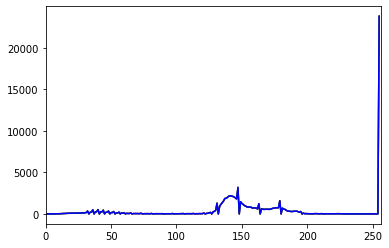

In [36]:
# We can apply this same technique to each of the color channels, but instead of five possible values, 
# we have 256 (the range of possible values for a channel value). The x-axis represents the 256 possible channel 
# values, and the y-axis represents the number of times a particular channel value appears across all pixels in an image:

# Calculate the histogram for each color channel
colors = ("r","g","b")

# For each channel: calculate histogram, make plot
for i, channel in enumerate(colors):
    histogram = cv2.calcHist([image_rgb], # Image
                        [i], # Index of channel
                        None, # No mask
                        [256], # Histogram size
                        [0,256]) # Range
    plt.plot(histogram, color = channel)
    plt.xlim([0,256])

# Show plot
plt.show()